In [49]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

4.1. Creación de la señal
Proponga una secuencia sinusoidal 𝑥𝑒(𝑛), con 0 ≤ 𝑛 ≤ 1000 , 𝐹0 = 0,01𝐻𝑧 y 𝐹𝑠 =25𝐻𝑧. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética 𝑥e(𝑛) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:
𝑦𝑒(𝑛) = 𝛼𝑥𝑒(𝑛 − 𝐷) + 𝑤(𝑛)

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y 𝑤(𝑛) representa el ruido generado por la electrónica de los sistemas de adquisición.



*   Genere las secuencias ficticias 𝑥𝑒(𝑛) y 𝑦𝑒(𝑛), implemente 𝑤(𝑛) como una secuencia de ruido Gaussiano con media cero y varianza 𝜎^2 =0,01, establezca 𝛼 = 0,8 y un retraso 𝐷 = 15 muestras. Grafique ambas señales.
Nota: Para generar el ruido gaussiano use la función de numpy: np.random.normal


Text(0.5, 0, 'Tiempo (s)')

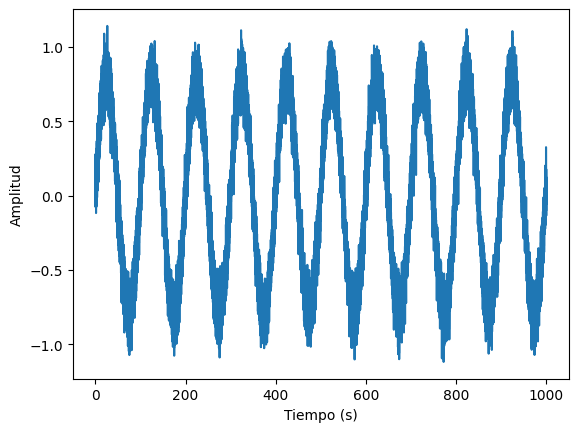

In [50]:
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retrado induciodo en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+(15/Fs))) #potencial con con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # señal adquirida con ruido y retrado.

plt.plot(n,y_e)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")


4.2. Diseño de un filtro

Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.

¿Qué cambios hay en los argumentos de la función para implementar un filtro
pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5
muestras/s.




Para implementar un filtro pasa banda es necesario indicar las dos frecuencias de corte para la banda, adicionalmete en necesario especificar en el parámetro "pass_zero" el tipo de filto con "bandpass" y para el filtro pasa altas poner este paráametro como "highpass".

In [51]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
wn2= 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass_fir = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro pasabajas
highpass_fir = signal.firwin(order+1,wn, pass_zero = 'highpass',window='hamming') #filtro pasa altas
bandpass_fir = signal.firwin(order+1,[wn,wn2], pass_zero = 'bandpass',window='hamming') #filtro pasa bandas

In [ ]:
print(lowpass_fir)
print(highpass_fir)
print(bandpass_fir)

Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare
cambios.

Butterworth 'butter' es uno de los filtros IIR mas comunes.

Cuando se diseña un filtro usando esta aproximación, se obtiene una respuesta plana en la banda de paso y esto se refleja en un voltaje de salida constante hasta la o las frecuencias de corte. Por esta característica, suele ser usado en los filtros anti-aliasing y en aplicaciones de conversión de datos. En general se usa en aplicaciones donde sea necesario tener una buena precisión de medida en la banda de paso. Entre sus desventajas se encuentra que su respuesta temporal tiene un sobreimpulso considerable que aumenta con el orden del filtro.

Mientras mayor orden tenga el filtro, más pronunciada va a ser la pendiente y en consecuencia el desempeño del filtro será más similar al comportamiento de un filtro ideal [1].

Los filtros Butterworth no tienen rizado ni en la banda pasante ni en la banda de rechazo y su respuesta de frecuencia se caracteriza por su respuesta suave a todas las frecuencias haciendo que entre las ventajas del filtro Butterworth es que sea suave [2].

[1] P. Rosero. Home. Accedido el 29 de octubre de 2024. [En línea]. Disponible: https://www.paulrosero-montalvo.com/gallery/diseño%20de%20filtros%20digitales.pdf

[2] “FILTROS IIR Y FIR”. Inicio - UPV/EHU. Accedido el 29 de octubre de 2024. [En línea]. Disponible: https://www.ehu.eus/procesadoinsvirtual/T6_filtros%20iir%20y%20fir6.html

In [53]:
lowpass_iir =  signal.iirfilter(order+1,wn, btype = 'lowpass', ftype='butter') #filtro pasabajas
highpass_iir = signal.iirfilter(order+1,wn, btype = 'highpass', ftype='butter') #filtro pasa altas
bandpass_iir = signal.iirfilter(order+1,[wn,wn2], btype = 'bandpass', ftype='butter') #filtro pasa bandas

In [ ]:
print(lowpass_iir)
print(highpass_iir)
print(bandpass_iir)

In [55]:
print("Pasa bajas IIR: "+ str(len(lowpass_iir[0])))
print("Pasa altas IIR: "+ str(len(highpass_iir[0])))
print("Pasa bandas IIR: "+ str(len(bandpass_iir[0])))
print("Pasa bajas FIR: "+ str(len(lowpass_fir)))
print("Pasa altas FIR: "+ str(len(highpass_fir)))
print("Pasa bandas FIR: "+ str(len(bandpass_fir)))

Pasa bajas IIR: 32
Pasa altas IIR: 32
Pasa bandas IIR: 63
Pasa bajas FIR: 31
Pasa altas FIR: 31
Pasa bandas FIR: 31


A pesar de que tanto los filtros FIR como los IIR fueron diseñados bajo las mismas condiciones, se aprecia que tanto los datos como la estructura de estos contenida dentro de cada uno de los filtros es diferente. Para el caso de los filtros FIR, se cuenta con 31 datos para cada uno de los filtros que corresponden a los coeficientes del numerador mientras que en el IIR, se evidencian 2 arreglos de datos de igual longitud que corresponden a los coeficientes del numerador y del denominador; tanto en el filtro pasa bajas como en el pasa bajas se tiene 32 datos en cada arreglo mientras que en el filtro pasa bandas se tienen 63 datos en cada arreglo.

4.3. Filtrado

Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas FIR implementado anteriormente y la señal 𝑦𝑒
(𝑛) ¿Por qué se utiliza sólo el
numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso
de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia?
¿Es adecuado el orden del filtro usado? Analice.

Solo se utiliza el numerador porque los filtros FIR no requieren ninguna retroalimentación de la salida para su computación por lo que la salida del sistema depende solo de los valores pasados y presentes de la entrada (no son recursivos).

El numerador hace referencia coeficientes que acompañarán a los valores pasados y presentes de la entrada.

b es el vector de coeficientes del numerador del filtro [3].

a es el vector de coeficientes del denominador del filtro [3].

x es el arreglo de la señal o datos a filtrar [3].

[3] “filtfilt — SciPy v1.14.1 Manual”. Numpy and Scipy Documentation — Numpy and Scipy documentation. Accedido el 29 de octubre de 2024. [En línea]. Disponible: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

Text(0.5, 0, 'Tiempo (s)')

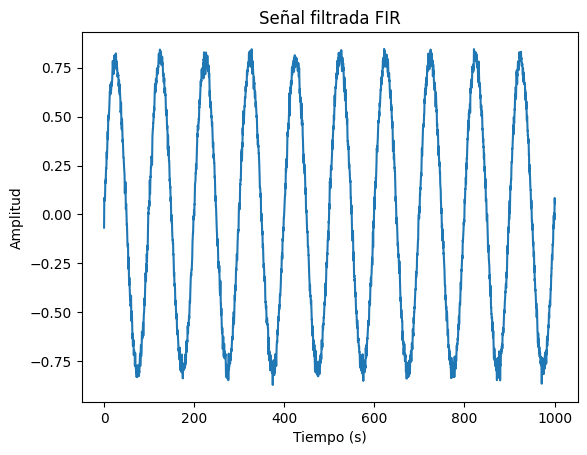

In [56]:
y_e_filtrada = signal.filtfilt(b=lowpass_fir,a=1,x=y_e) # aplicación del filtro
plt.plot(n,y_e_filtrada)
plt.title('Señal filtrada FIR')
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

Además del pulimiento de la señal filtrada y conservación de la fase, se evidencia una reducción considerable de la amplitud de la señal original que era de poco más de 1, en cambio, para la señal filtrada se tiene una amplitud alrededor de 0.8, esto puede explicarse por la atenuación introducida por el filtro, cuya pendiente (que está determinada por el orden del filtro) determina la razón de cambio de la atenuación de la señal [4], esto se da porque los filtros no cortan exactamente la señal en la frecuencia de corte establecida y lo que hacen es disminuir la potencia de la señal a medida que su frecuencia se va alejando de la frecuencia de corte [5]. Es por ello que es caso más favorable para el diseño e implementación de un filtro es en el que la frecuencia de corte por ruido se encuentre lejos de la señal de interés y en este caso se podría usar un orden muy bajo.

[4] “Filtros de Audio: Una guía completa”. Sonipedia. Accedido el 31 de octubre de 2024. [En línea]. Disponible: https://sonipedia.com/blog/filtros-de-audio

[5] https://solectroshop.com/es/blog/todo-lo-que-necesitas-saber-sobre-filtros-rc-n52#:~:text=Problemas%20de%20los%20filtros,hay%20entre%2010%20y%2020kHz

Frecuencia de corte: 0.1


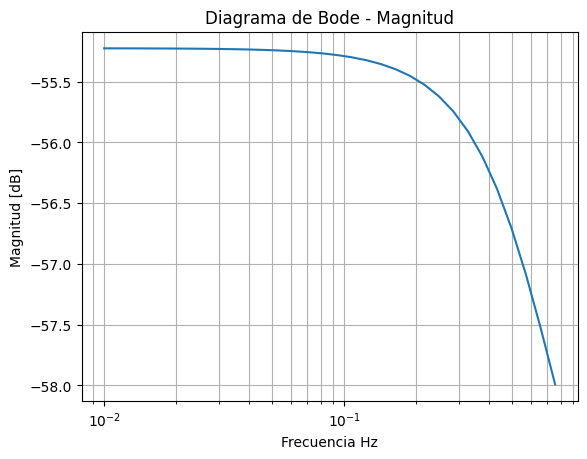

In [57]:
print("Frecuencia de corte: "+str(wn))
#Diagrama de bode para determinar si el orden es correcto
system = signal.TransferFunction(lowpass_fir, 1)
#
# Crear el diagrama de Bode
w, mag, phase = signal.bode(system)
frec=w*Fs/(2*np.pi)

# Graficar Magnitud
plt.figure()
plt.semilogx(w[0:32], mag[0:32])
plt.title('Diagrama de Bode - Magnitud')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Magnitud [dB]')
plt.grid(which='both', axis='both')
plt.show()

Se evidencia una caida en la pendiente marcada, lo cual puede dar indicios de que el orden del filtro es adecuado.

Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas IIR implementado anteriormente y la señal 𝑦𝑒
(𝑛) ¿Por qué se utiliza el
numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal
caso hágalo y analice

Se implementa el numerador y el denominador porque este filtro es recursivo y toma características de la salida (tiene retroalimentación).

[nan nan nan ... nan nan nan]


Text(0.5, 0, 'Tiempo (s)')

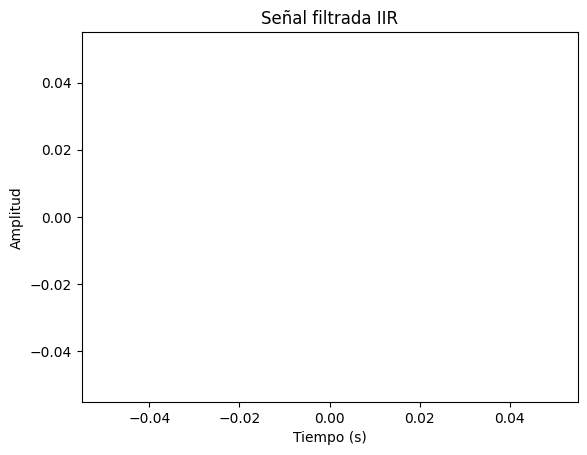

In [58]:
y_e_filtrada_iir = signal.filtfilt(b=lowpass_iir[0],a=lowpass_iir[1],x=y_e) # aplicación del filtro
print(y_e_filtrada_iir)
plt.plot(n,y_e_filtrada_iir)
plt.title('Señal filtrada IIR')
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

Con este orden del filtro no se obtiene una señal para graficar pues los valores obtenidos de la señal filtrada son NaN, esto puede deberse a la inestabilidad del filtro cuando se trabajan ordenes altos, haciendo que la salida del filtro se desborde, es decir, aumente desproporcionadamente en tamaño sin ser necesariamente infinita.


Text(0.5, 0, 'Tiempo (s)')

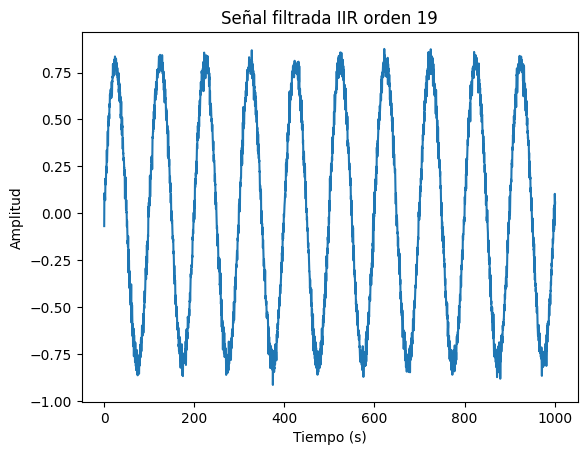

In [59]:
lowpass_iir_orden =  signal.iirfilter(19,wn, btype = 'lowpass', ftype='butter') #filtro pasabajas
y_e_filtrada_iir_orden = signal.filtfilt(b=lowpass_iir_orden[0],a=lowpass_iir_orden[1],x=y_e) # aplicación del filtro
plt.plot(n,y_e_filtrada_iir_orden)
plt.title('Señal filtrada IIR orden 19')
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

La señal obtenida luego de filtrar con un IIR de orden menor presenta una reducción del ruido original de la señal.

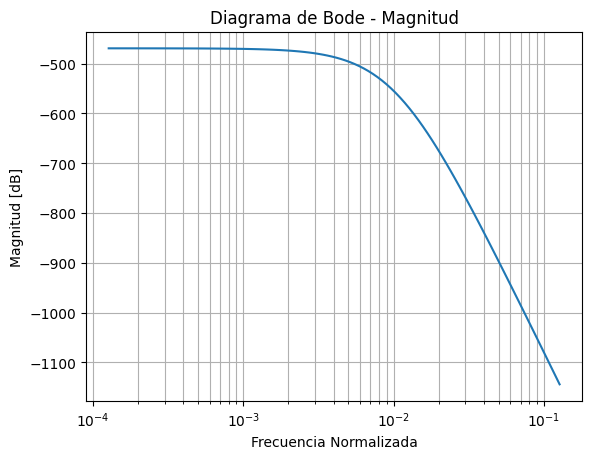

In [60]:
system = signal.TransferFunction(lowpass_iir[0], lowpass_iir[1])
#
# Crear el diagrama de Bode
w, mag, phase = signal.bode(system)
nyquist_f = Fs / 2
f_normalizada = w / (2 * np.pi * nyquist_f)

# Graficar Magnitud
plt.figure()
plt.semilogx(f_normalizada, mag)
plt.title('Diagrama de Bode - Magnitud')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Magnitud [dB]')
plt.grid(which='both', axis='both')
plt.show()

4.4 Aplicación
Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz.
Extraiga y trabaje con el canal 1 de la señal.

• Realice un análisis frecuencial con la función que permite calcular el
periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.

• Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

• Grafique un segmento de las señales antes y después de filtrar, analice los
cambios.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive') #force_remount=True
import scipy.io
archivo = '/content/drive/MyDrive/Biosenales/senal_filtros.txt'
senal= np.loadtxt(archivo)


60000 (60000, 16)
tamaño de la senal Canal 1 60000 'shape': (60000,) tiempo (s) 120.0
Nueva cantidad de muestras: 12000


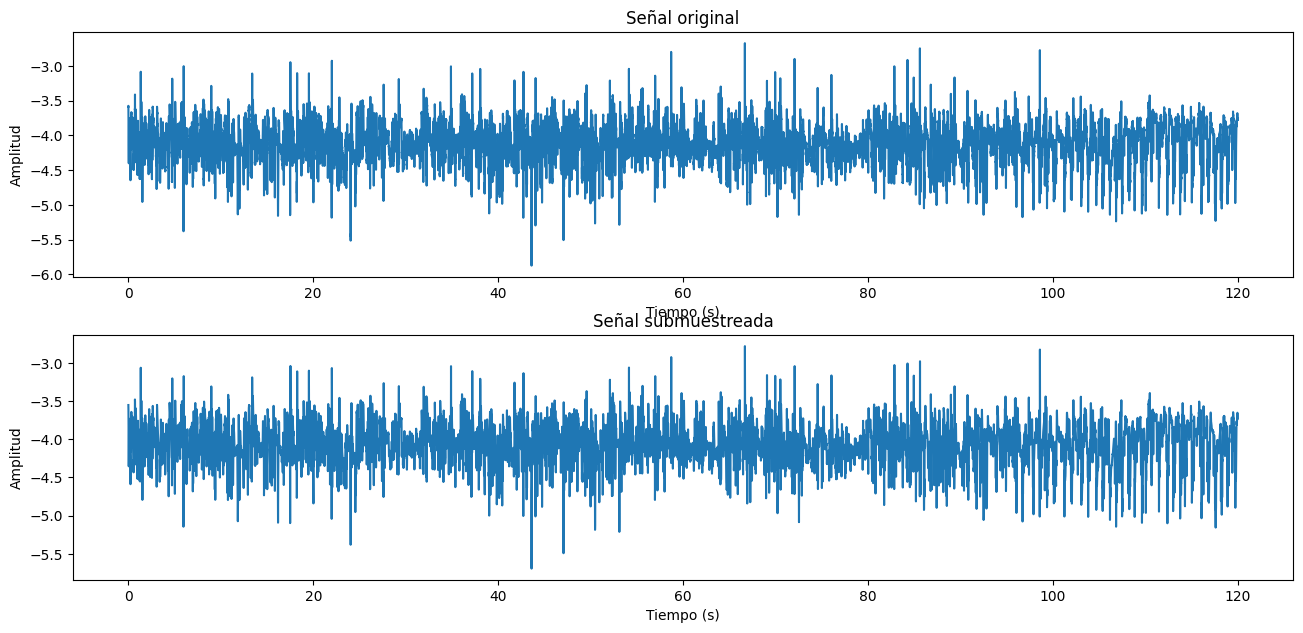

In [62]:
senal = np.loadtxt("senal_filtros.txt")
print(len(senal),senal.shape)

senal_canal1 = senal[:,1]
fs = 500                        # Frecuencia de muestreo, 500 muestras por segundo, por lo cual si tenemos 60000 puntos:
t=len(senal_canal1)/fs          # El tiempo total será 60000/500 = 120 segundos
print("tamaño de la senal Canal 1",len(senal_canal1),"'shape':",senal_canal1.shape,"tiempo (s)",t)

tiempo = np.linspace(0, t, len(senal_canal1))   # vector desde 0 hasta t con 6000 muestras

## PODEMOS SUBMUESTREAR

fs_new = 100  # Nueva frecuencia de muestreo
decim = int(fs/fs_new)  # Factor de decimación
senal_submuestreada = signal.decimate(senal_canal1, decim)

print("Nueva cantidad de muestras:",len(senal_submuestreada))
# Graficar las señales
plt.figure(figsize=(13, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo, senal_canal1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal original')
plt.tight_layout()
plt.subplot(2, 1, 2)
plt.plot(tiempo[::decim], senal_submuestreada)
plt.title('Señal submuestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

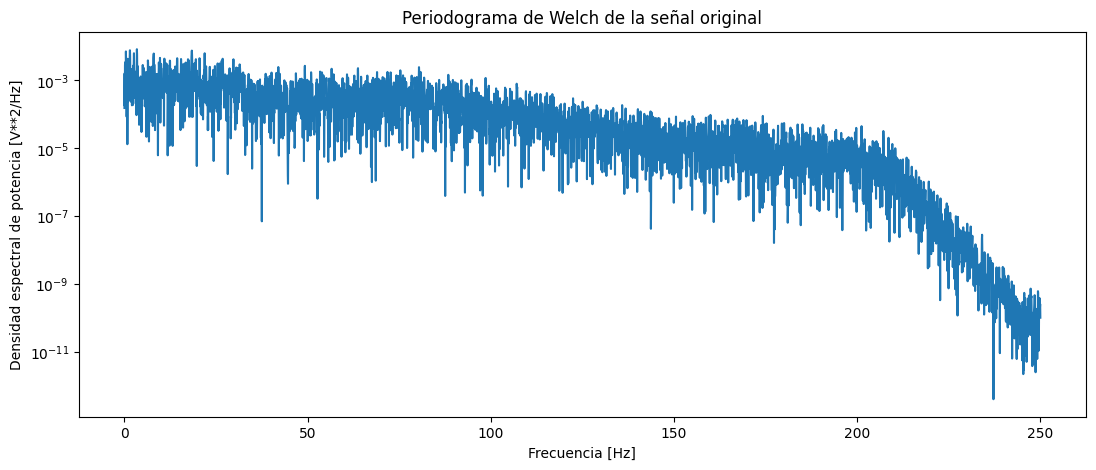

In [63]:
# Periodorama Welch
f, Pxx_den = signal.welch(senal_submuestreada, fs, nperseg=10000)
#nperseg es el número de puntos por ventana, máximo la longitud de la señal.
plt.figure(figsize=(13, 5))
plt.semilogy(f, Pxx_den)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [V**2/Hz]')
plt.title('Periodograma de Welch de la señal original')
plt.show()

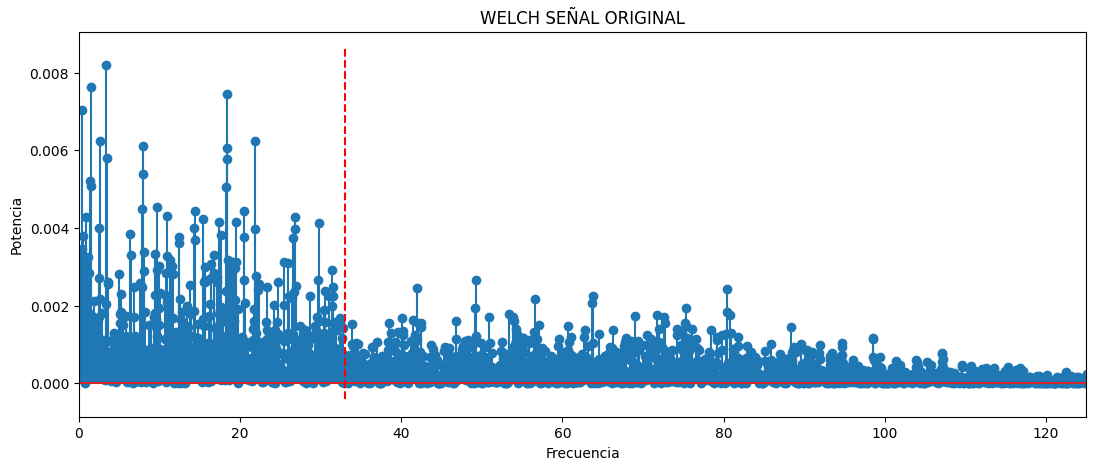

In [64]:
nperseg = 10000  # ancho de la ventana
noverlap = int(nperseg/2)  # solapamiento de las ventanas

f, Pxx = signal.welch(senal_submuestreada, fs, 'hann', nperseg, noverlap)

# graficamos frecuencia vs potencia
plt.figure(figsize=(13, 5))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 125])  # rango para el eje X
plt.plot([33, 33], [plt.ylim()[0], plt.ylim()[1]], color='r', linestyle='--')
plt.title("WELCH SEÑAL ORIGINAL")
plt.show()

Como se puede observar, la señal original esta cargada de ruido, además de contar con un offset cercano a 4. La presencia de picos aleatorios en todo el espectro podría ser un indicador de presencia de ruido blanco.

Dada la gran cantidad de datos, se logró submuestrear la señal en un factor de 5 manteniendo la dinámica de la misma.

La mayor parte de la energía de la señal se concentra en las frecuencias más bajas, es decir, entre 0 y aproximadamente 100 Hz. A medida que aumenta la frecuencia, la densidad espectral de potencia disminuye de manera gradual, esto indica que la señal contiene componentes de frecuencia más altas, pero con una amplitud significativamente menor.

También se observa que no hay un componente significativo de ruido correspondiente a la red eléctrica pues en la frecuencia de 60 Hz no hay un pico de potencia sobresaliente.

nperseg es el valor de longitud de cada segmento. El valor predeterminado es Ninguno (None), pero si la ventana es str o tupla, se establece en 256, y si la ventana es similar a una matriz, se establece en la longitud de la ventana [6].

Se implementó una longitud de segmento amplia para intentar reducir la varianza de estimaciones al ser una señal tan ruidosa, Además, se determinó una frecuencia de corte de 33 Hz para intentar capturar sólo las frecuencias más relevantes de la señal como se muestra a continuación.

[6] Scipy , “scipy.signal.welch — SciPy v1.9.3 Manual,” docs.scipy.org, 2023. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html

orden:  24


[]

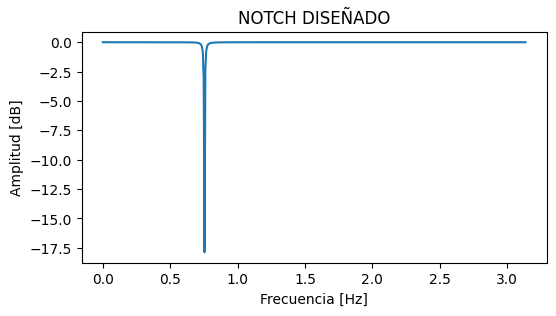

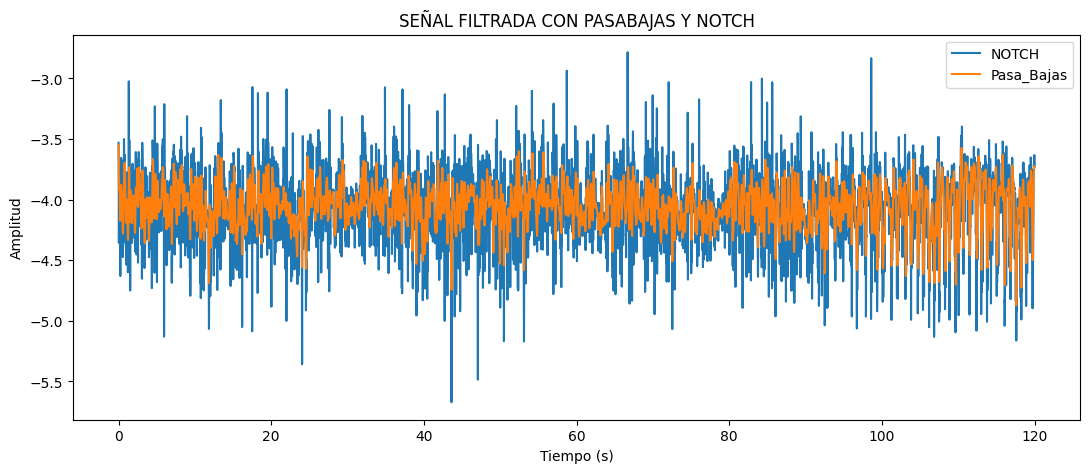

In [65]:
import math
# No hay requerimientos específicos, la señal es desconocida, el filtro mas usado en bioingeniería es hamming:
deltaF = 3.3
fs = 500
Fc = 33 # determino la frecuencia de corte segun la inspección de welch
ancho_bandaT= Fc*2

## PASABAJAS ##
order = deltaF/(ancho_bandaT/fs)
order = math.floor(order) # orden calculado segun requerimientos
nyquist = fs/2 # frecuencia de nyquist
wn = Fc/nyquist #frecuencia de corte normalizada respecto nyquist

print("orden: ",order)
lowpass = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
y_PASABAJAS = signal.filtfilt(b=lowpass,a=1,x=senal_submuestreada) # aplicación del filtro

## NOTCH ###
f_notch = 60
quality_factor = ancho_bandaT
notch_freq = f_notch / (fs / 2) # Normalized Frequency
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor)

# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch)
#freq = w * fs / ( 2 * np.pi )

#SEÑAL FILTRADA CON NOTCH:
y = signal.lfilter(b_notch, a_notch, senal_submuestreada)

plt.figure(figsize=(6, 3))
plt.plot(freq, 20 * np.log10(abs(h)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.title("NOTCH DISEÑADO")

plt.figure(figsize=(13, 5))
plt.plot(tiempo[::decim],   y,     label="NOTCH")
plt.plot(tiempo[::decim],   y_PASABAJAS,   label="Pasa_Bajas")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("SEÑAL FILTRADA CON PASABAJAS Y NOTCH")
plt.legend()
plt.plot()

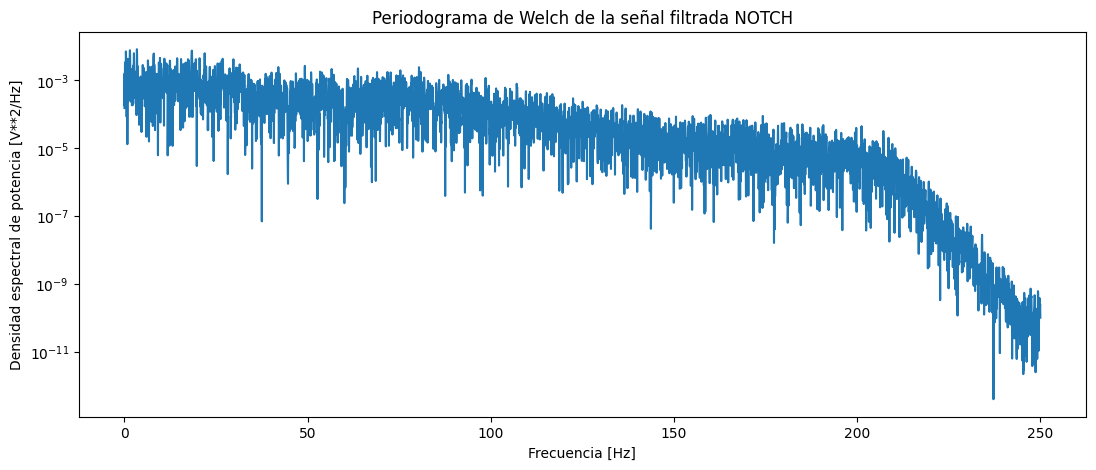

In [66]:
f, Pxx_den = signal.welch(y, fs, nperseg=10000)
#nperseg es el número de puntos por ventana
plt.figure(figsize=(13, 5))
plt.semilogy(f, Pxx_den)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [V**2/Hz]')

plt.title("Periodograma de Welch de la señal filtrada NOTCH")

plt.show()

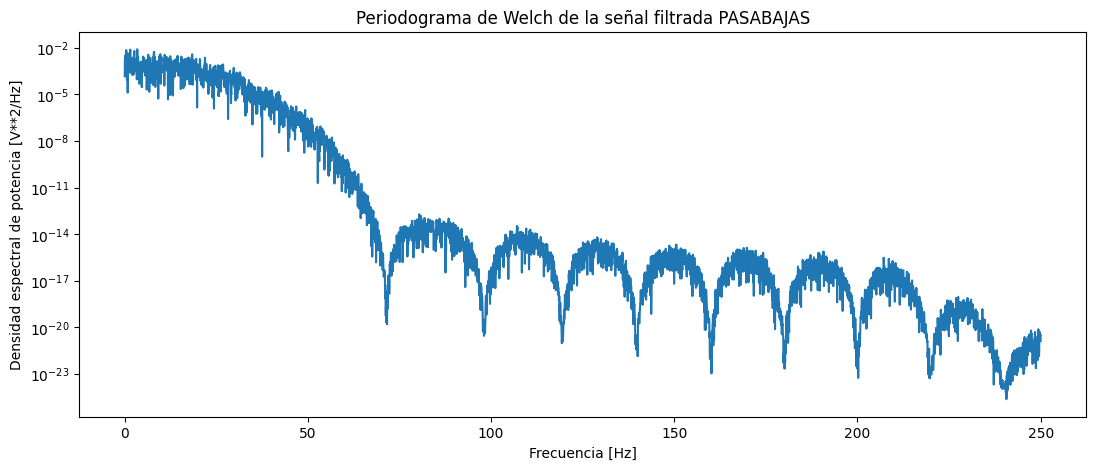

In [67]:
f, Pxx_den = signal.welch(y_PASABAJAS, fs, nperseg=10000)
#nperseg es el número de puntos por ventana
plt.figure(figsize=(13, 5))
plt.semilogy(f, Pxx_den)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [V**2/Hz]')

plt.title("Periodograma de Welch de la señal filtrada PASABAJAS")

plt.show()

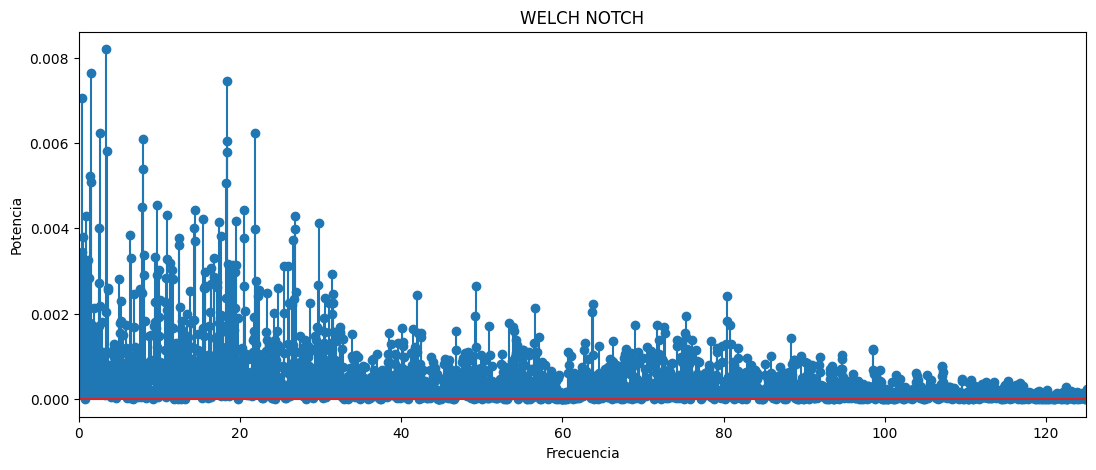

In [68]:
f, Pxx = signal.welch(y, fs, 'hann', nperseg, noverlap)

# graficamos frecuencia vs potencia
plt.figure(figsize=(13, 5))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 125])  # rango para el eje X
plt.title("WELCH NOTCH")
plt.show()

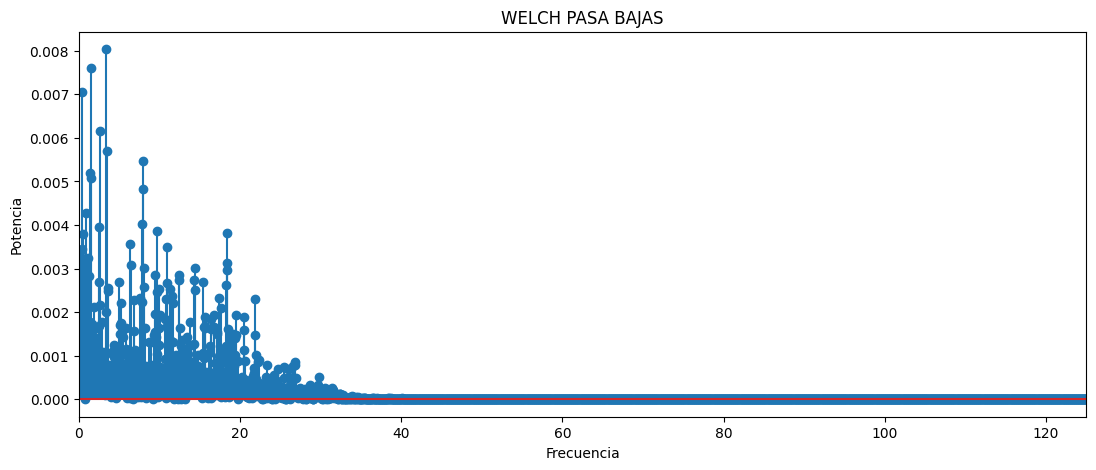

In [69]:
nperseg = 10000  # ancho de la ventana
noverlap = int(nperseg/2)  # solapamiento de las ventanas

f, Pxx = signal.welch(y_PASABAJAS, fs, 'hann', nperseg, noverlap)

# graficamos frecuencia vs potencia
plt.figure(figsize=(13, 5))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 125])  # rango para el eje X
plt.title("WELCH PASA BAJAS")
plt.show()

Dadas las características del primer periodorama welch obtenido de la señal, se opta por intentar filtrarla con un filtro hamming pasabajas. Por otro lado se empleo un notch a 60 Hz para determinar si alguna componente del ruido se atribuye a la red eléctrica.

De acuerdo a los gráficos obtenidos, un filtro pasabajas filtra gran parte de la señal (se atenua la potencia alrededor de los 30 Hz en adelante) dando un cambio significativo a la señal, en cambio, el resultado del filtrado con el filtro notch no tiene cambios muy apreciables porque como se había mencionado anteriormente, la señal no presentaba un componente significativo de potencia en 60 Hz por lo que la señal filtrada resulta ser casi igual a la señal original.

Como conclusión, tomando lo anterior es posible afirmar que para filtrar correctamente una señal de interés es necesario conocer sus características dinámicas en los diferentes dominios (temporal y frecuencial), para de esta forma, aplicar los métodos necesarios para eliminar el resto de información de la misma. Sin esto, aunque se puede realizar un analisis espectral, lo más probable es que no se logre un buen filtrado, especialmente con datos tan ruidosos.